# Regression Project

## Diabetes in Pima Inidan Women

### Richard Zhang

Diabetes is a major global health issue, particularly in underserved areas where access to timely healthcare services is limited. Predictive modeling based on health indicators can play a key role in identifying individuals at risk.

This study makes use of the Pima Indians Diabetes Dataset from Kaggle, which includes medical records of 768 women of Pima heritage, aged 21 years and older. The dataset contains several predictor variables such as glucose concentration, blood pressure, insulin levels, BMI, number of pregnancies, age, and the diabetes pedigree function, along with a binary outcome indicating diabetes diagnosis.

The research addresses two main objectives:

**Exploratory Data Analysis (EDA)**: Apply descriptive statistics and graphical visualizations to summarize the dataset and identify which variables show the strongest correlations with one another, as well as with diabetes outcomes.

**Model Evaluation**: Use logistic regression to predict diabetes outcomes and assess whether it is the most appropriate and effective model for this dataset, considering both accuracy and interpretability.

By combining correlation analysis with predictive modeling, the study aims to highlight the most influential factors related to diabetes and determine whether logistic regression provides a reliable and interpretable tool for prediction.

In [49]:
#Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns; sns.set()  # for plot styling
%matplotlib inline
df = pd.read_csv('diabetes.csv')

## Analyzing data using statistical and graphical vixualizations:

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
print(df.describe())
print(df.describe().T)

       Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]
                          count        mean  ...        75%     max
Pregnancies               768.0    3.845052  ...    6.00000   17.00
Glucose                   768.0  120.894531  ...  140.25000  199.00
BloodPressure             768.0   69.105469  ...   80.00000  122.00
SkinThickness             768.0   20.536458  ...   32.00000   99.00
Insulin                   768.0   79.799479  ...  127.25000  846.00
BMI                       768.

## Implementing Histograms

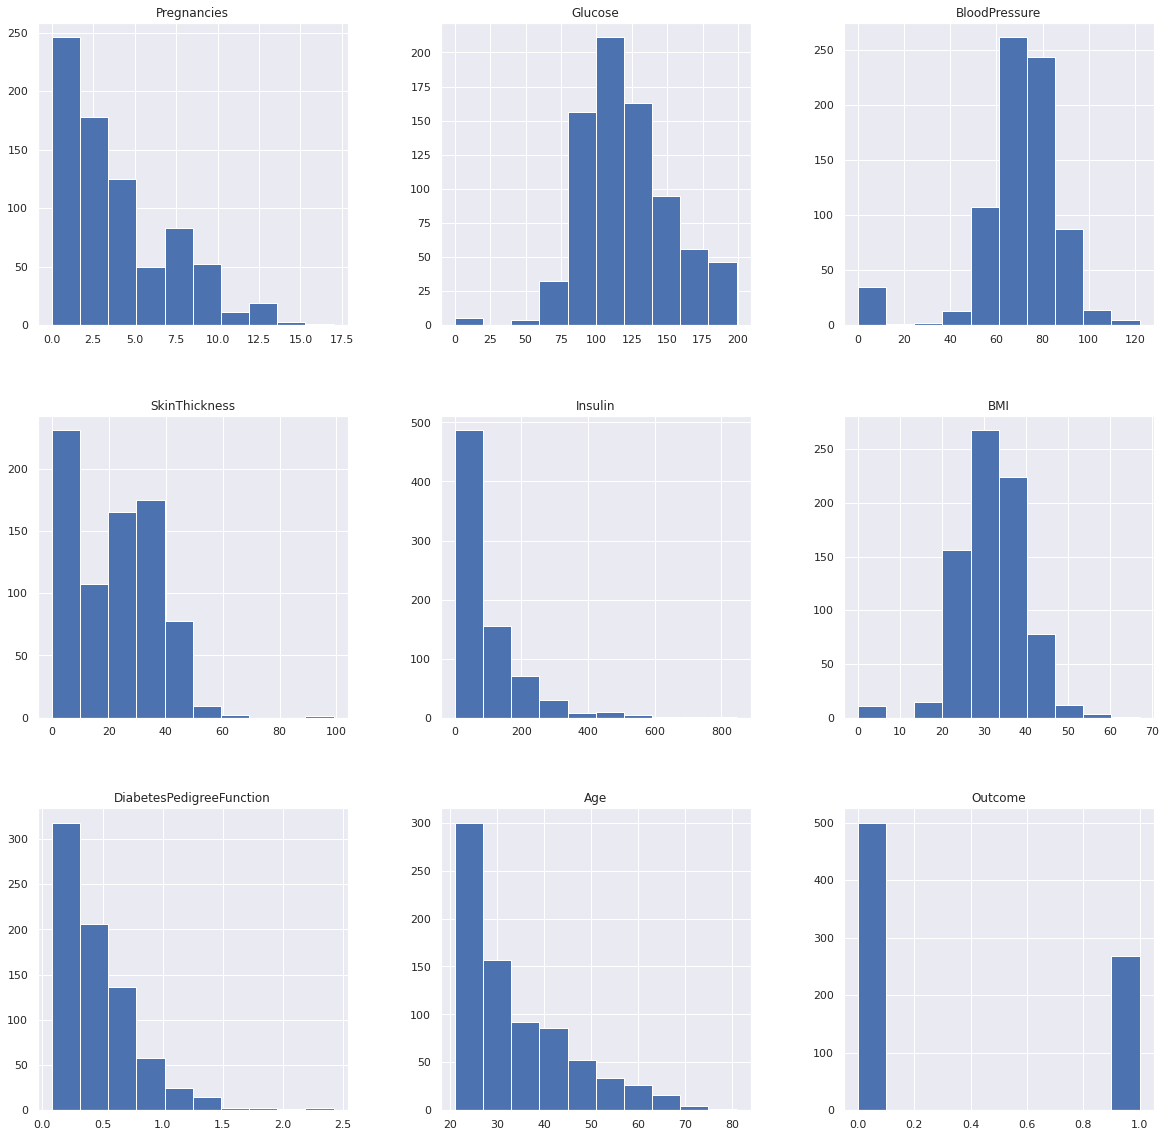

In [5]:
%matplotlib inline
df.hist(figsize = (20,20))
plt.show()

## Bloxplot of Data:

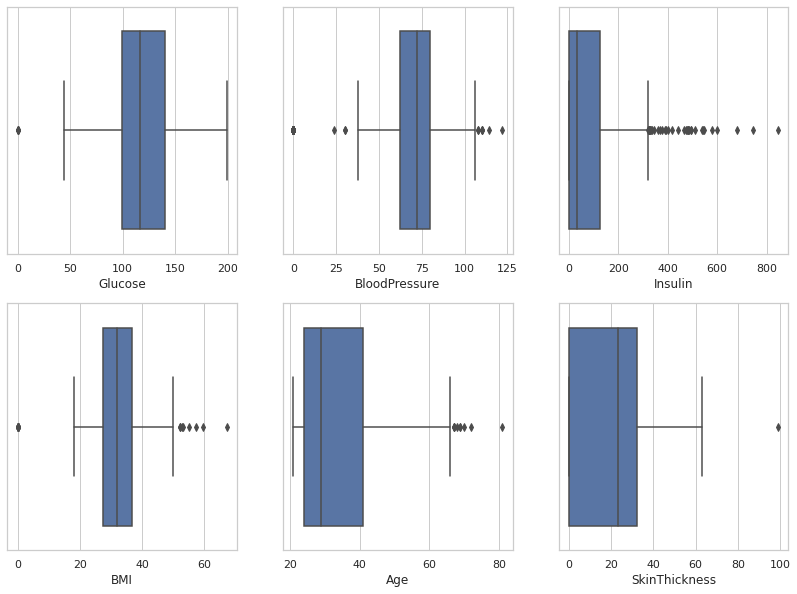

In [6]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Glucose',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='BloodPressure',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Insulin',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='BMI',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Age',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='SkinThickness',data=df)

- Based on the boxplots, we can see that the insulin rates of the sample has lots of outliers. We can also see that there are no outliers in the Glucose rate variable. Blood Pressure rate variable is the only variable that has outliers that are below the 25th percentile.

## Scatter Plot of Data:

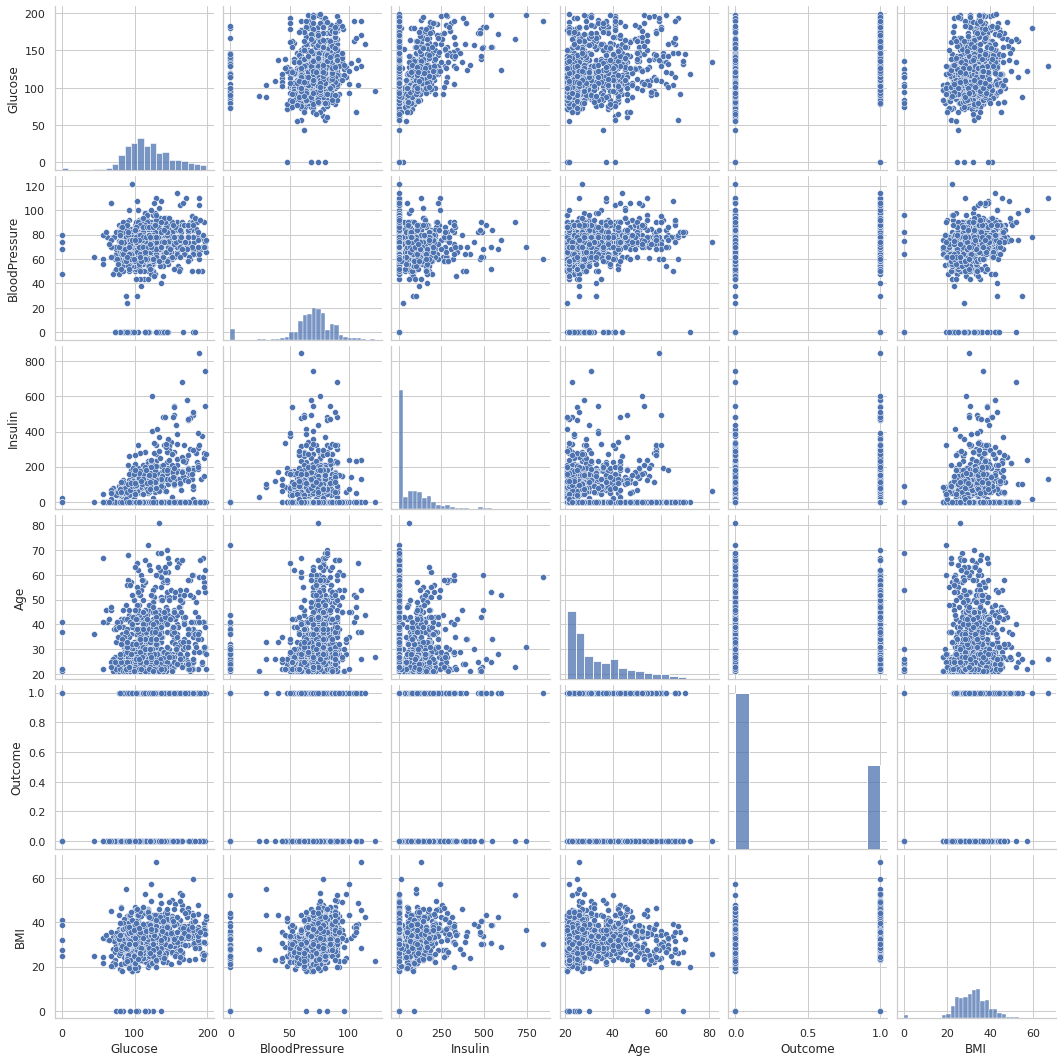

In [7]:
mean_col = ['Glucose','BloodPressure','Insulin','Age','Outcome','BMI']

sns.pairplot(df[mean_col],palette='Accent')

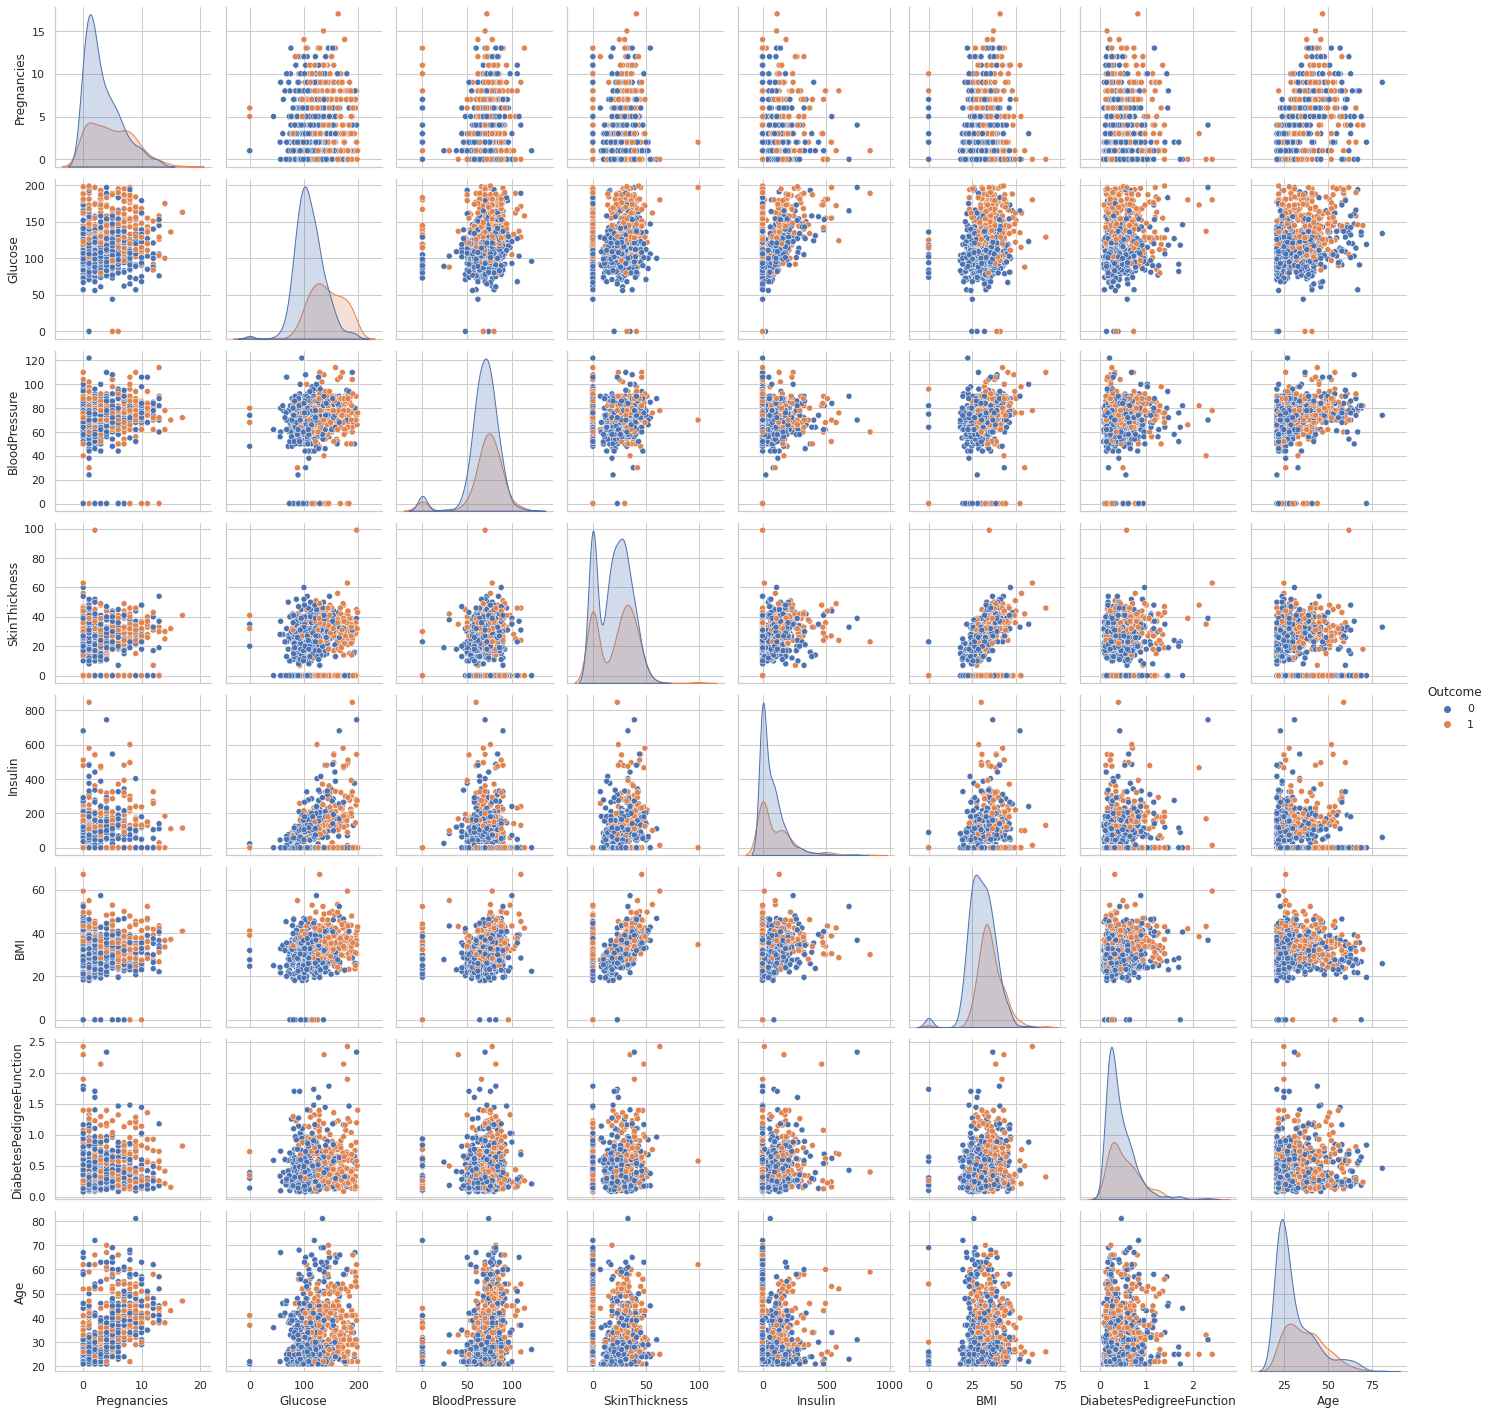

In [8]:
sns.pairplot(df,hue='Outcome')

## Based on the data given the distributions:

### Number of pregnancies:
Based on the distribution graph, we can see that the distribution is right skewed. That means that most Pima Indian women either had never been pregnant before or had very few pregnancies. The lowest number of pregnancies are 0, and the largest number of pregnancies is 17.

### Glucose rate:
Based on the distribution graph, we can see that the distribution is lightly skewed to the right and almost bell shaped. That means that most of the Pima Indian womens' gluscose rates are about average but a little more women have glucose rates lower than the average rate. The lowest glucose rate was 0, and the highest glucose rate was 199.

### Blood pressure:
Based on the distribution graph, we can see that the distribution is left skewed. That means that most of the Pima Indian women in the sample have blood pressure rates higher than the average. The lowest blood pressure rate is 0, and the highest blood pressure rate is 122.  

### Skin thickness:
Based on the distribution graph, we can see that the distribution is right skewed. That means that most Pima Indian women have skin that is thinner than the average. The lowest skin thickness is 0, and the highest skin thinkness is 99.

### Insulin rate:
Based on the distribution graph, we can see that the distribution is right skewed. That means that most Pima Indian women have insulin rates that are lower than the average. The lowest insulin rate is 0, and the highest insulin rate is 846.

### BMI:
Based on the distribution graph, we can see that the distribution is lightly skewed to the left and almost bell shaped. That means that most of the Pima Indian womens' BMI are about average but a little more women have a BMI that is larger than the average rate. The smallest BMi value was 0, and the largest BMI value is 67.1.

### Diabetes Pedigree function:
Based on the distribution graph, we can see that the distribution is right skewed. That means that most Pima Indian women have a diabete pedigree that is lower than the average rate. The lowest diabetes pedigree was 0.078, and the highest diabetes pedigree was 2.42.

### Age:
Based on the distribution graph, we can see that the distribution is right skewed. That means that most Pima Indian women that were sample were younger than the average age of women being sampled. The youngest woman was 21 years old, and the oldest woman was 81 years old.

### Outcome:
Based in the distribution, we can see that there are two clusters. This is due to the fact that there was only two categorical values being sampled. Having two clusters means that there is two distant groups that are prominant in the distribution. The smallest value was 0, and the largest value is 1.

#### Out of the following distributions:
- The largest value is 846 from the Insulin rate distribution
- Outcome distribution is the only distribution that has two clusters because it has two categorical values.
- Observing the scatterplots we can see that there are a positive relationships between every variables. 

## 3d scatter plot consisting of Glucose results, Blood Pressure rates, Insulin results: 
 - with key representing women who are normal or women who have diabetes.

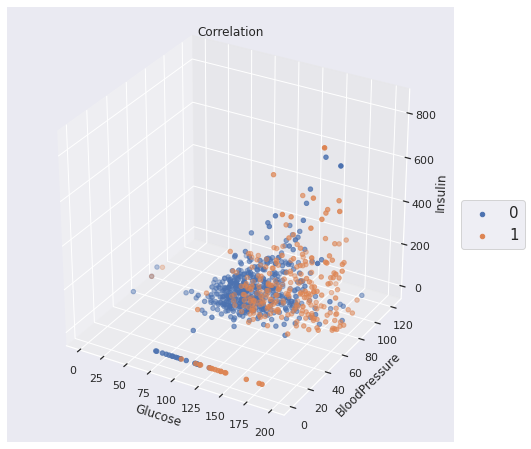

In [50]:
%matplotlib inline
groups = df.groupby('Outcome')

from mpl_toolkits.mplot3d import Axes3D
colors = ['red','green']
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')


for name, group in groups:
    ax.scatter(group.Glucose, group.BloodPressure, group.Insulin, label=name)
ax.set_xlabel('Glucose')
ax.set_ylabel('BloodPressure')
ax.set_zlabel('Insulin')
ax.set_title('Correlation')


box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 15})
plt.show()

**0 = No Diabetes**

**1 = Diabetes**
- Based on this 3d correlection graph, we can see that all three variables have a postive corrlection with eachother.
- We can also see that as every variable's values start to get larger, there will be more Pima Indian Women having diabetes. 

## Correlation:

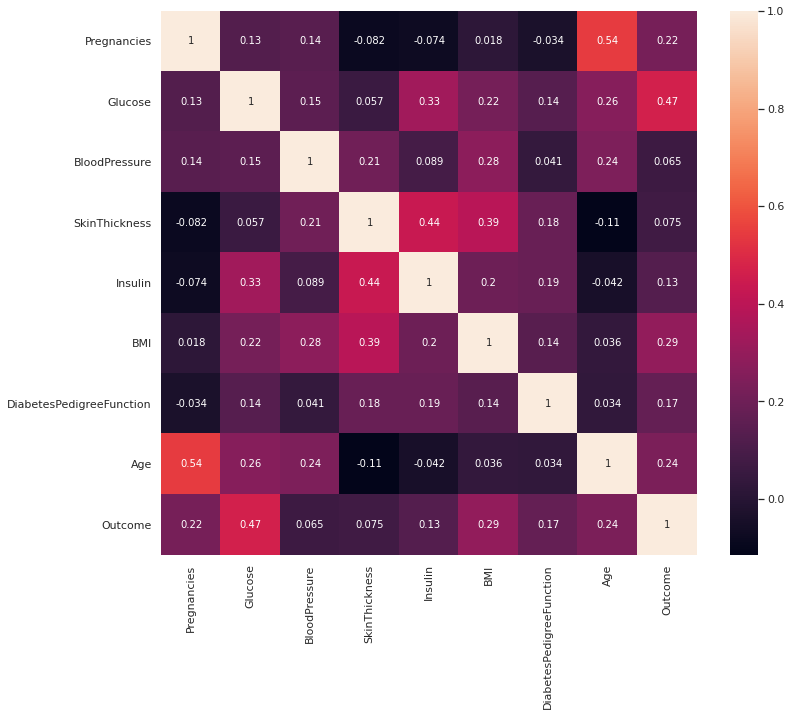

In [51]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr(), annot =True)

- Graph shows that we dod not have a strong correlation between the features. 
- The largest corrleation is between age and pregnancies (0.54).

## Installing SKompiler

In [20]:
! pip install SKompiler

     |████████████████████████████████| 45 kB 1.5 MB/s 
  Created wheel for SKompiler: filename=SKompiler-0.6-py3-none-any.whl size=54288 sha256=29c5ebdab45369c71a47360f236f05ea766b85752597f634708cc6fe04879e17
  Stored in directory: /root/.cache/pip/wheels/47/1c/59/b80a730f4afd2144bad854df4b167b812486c9d4c1bd4cf4c5
Successfully built SKompiler


## Preparing Data:

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import time
from skompiler import skompile

In [53]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

In [54]:
X.shape

(768, 8)

In [55]:
y.shape

(768,)

In [56]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 8)
X_test Shape:  (168, 8)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [57]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X_train,y_train)
logistic_regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logistic_regression.intercept_

array([-5.45821095])

In [59]:
logistic_regression.coef_

array([[ 1.12307195e-01,  2.49838083e-02, -1.51858750e-02,
        -2.41008557e-03, -2.25184041e-04,  6.50614375e-02,
         6.79097521e-01,  3.88835443e-05]])

In [60]:
logistic_regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[98, 10],
       [27, 33]])

In [62]:
accuracy_score(y_test,y_pred)

0.7797619047619048

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       108
           1       0.77      0.55      0.64        60

    accuracy                           0.78       168
   macro avg       0.78      0.73      0.74       168
weighted avg       0.78      0.78      0.77       168



In [64]:
accuracies= cross_val_score(estimator=logistic_regression,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 77.83 %
Standart Deviation of Accuracies: 3.73 %


- When we implement cross validation, we can see that we get a mean accuracy rate of 77.83%. We also get a standard deviation of 3.73%.

In [65]:
logistic_regression.predict(X_test)[:10]

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [66]:
results =pd.DataFrame(logistic_regression.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]
results

,Possibility of 0,Possibility of 1,Class
0,0.880172,0.119828,0
1,0.671251,0.328749,0
2,0.829296,0.170704,0
3,0.364718,0.635282,1
4,0.174197,0.825803,1
5,0.635785,0.364215,0
6,0.217196,0.782804,1
7,0.921392,0.078608,0
8,0.544061,0.455939,0
9,0.873300,0.126700,0


In [67]:
logistic_regression = LogisticRegression(random_state=0,solver="liblinear").fit(X,y)

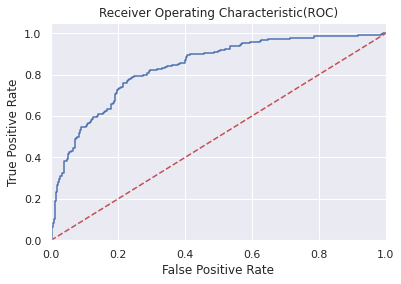

In [68]:
logistic_regression_roc = roc_auc_score(y,logistic_regression.predict(X))

fp,tp,trshld = roc_curve(y,logistic_regression.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %logistic_regression_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()

- We can see that we have a logistic regression. Although as our False Positive increases our True Positive rate also increases. However, our True Positive rate has a greater exponential increase than our False Positive rate. 

In [69]:
# Logisitc Regression Example

#https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# define dataset
df = pd.read_csv('diabetes.csv')
#print(df)
X = df[df.columns[0:12]]
print(X)
y = df[['Outcome']]

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# defining grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]
Best: 1.000000 using {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
1.000000 (0.000000) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
1.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
1.000000 (0.000000) with: {'C': 10, 'penalty': 'l2', 'solver'

## Ridge Regression

In [70]:
# https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification

# example of grid searching key hyperparametres for ridge classifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# define dataset
df = pd.read_csv('diabetes.csv')
#print(heartatdftackData)
X = df[df.columns[0:12]]
print(X)
y = df[['Outcome']]

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, np.ravel(y_train))
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]
Best: 1.000000 using {'alpha': 0.1}
1.000000 (0.000000) with: {'alpha': 0.1}
1.000000 (0.000000) with: {'alpha': 0.2}
1.000000 (0.000000) with: {'alpha': 0.3}
1.000000 (0.000000) with: {'alpha': 0.4}
1.000000 (0.000000) with: {'alpha': 0.5}
1.000000 (0.000000) with: {'alpha': 0.6}
1.000000 (0.000000) with: {'alpha': 0.7}
1.000000 (0.000000) with: {'alpha': 0.8}
1.000000 (0.000000) with: {'alpha': 0.9}
1.000000 (0.000000) with: {'alp

## Lasso Regression

In [94]:

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# define dataset
df = pd.read_csv('diabetes.csv')
#print(heartatdftackData)
X = df[df.columns[0:12]]
print(X)
y = df[['Outcome']]

# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

reg = Lasso(alpha=0.5)
reg.fit(X_train, y_train)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [95]:
print('Lasso Regression: R^2 score on training set', reg.score(X_train, y_train)*100)
print('Lasso Regression: R^2 score on test set', reg.score(X_test, y_test)*100)

Lasso Regression: R^2 score on training set 25.6061953732732
Lasso Regression: R^2 score on test set 18.22454395395876


In [96]:
lambdas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
l_num = 7
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

In [97]:
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
       
    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)

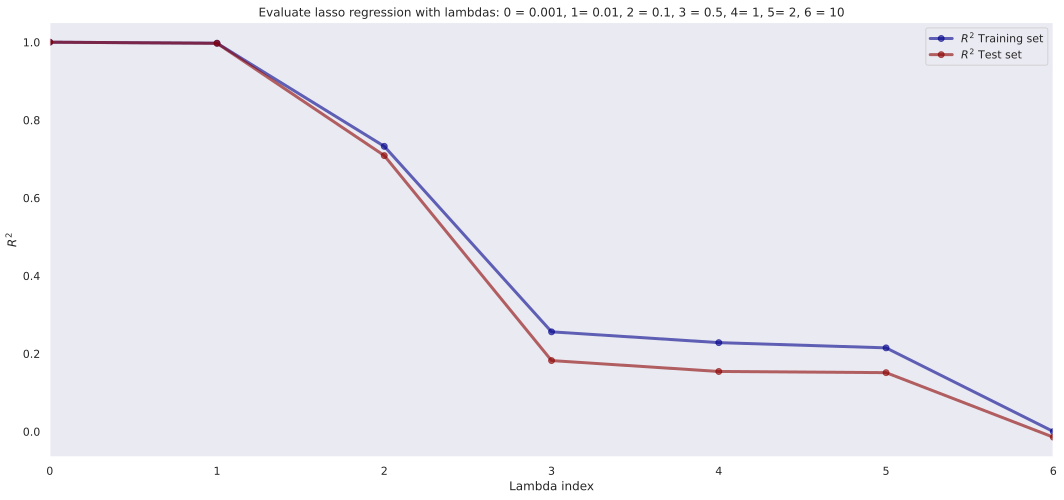

In [98]:
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lambda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lambdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

- We can clearly see that when our lambda index is increasing, the percentage of variation within the data is making a dramatic regression/decrease. The model's quality is getting worse when the our lambda value increases. 
- We can see that both the test and training sets are following the same shape however The training set has a higher R^2 score than the test set.
- We can see that when the lambda index reaches 6 our R^2 score reaches to 0.0. 

## Identifiy best lambda and coefficients

In [99]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    99.997081
lambda        0.001000
Name: 0, dtype: float64

In [100]:
# Coefficients of best model
reg_best = Lasso(alpha = 0.1)
reg_best.fit(X_train, y_train)
reg_best.coef_

array([ 2.67324791e-03,  3.91089608e-03, -1.96266609e-04,  0.00000000e+00,
       -6.55462621e-05,  5.65906032e-03,  0.00000000e+00,  1.79411776e-03,
        3.87781509e-01])

In [101]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, reg_best.predict(X_test))

0.06968702031899451

## Cross Validation

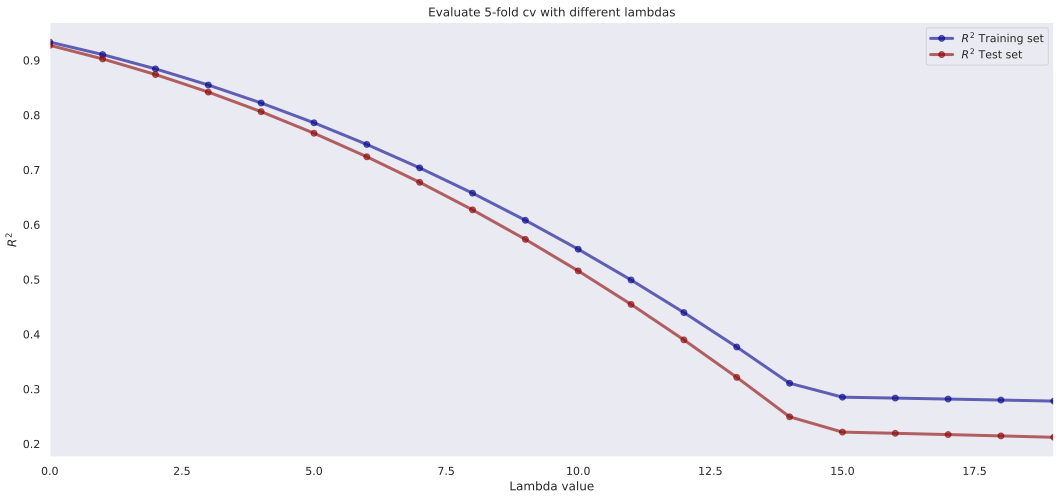

In [102]:
l_min = 0.05
l_max = 0.2
l_num = 20
lambdas = np.linspace(l_min,l_max, l_num)

train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)

pred_num = X.shape[1]
coeff_a = np.zeros((l_num, pred_num))

from sklearn.model_selection import cross_val_score

for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)
    results = cross_val_score(reg, X, y, cv=5, scoring="r2") 

    train_r_squared[ind] = reg.score(X_train, y_train)    
    test_r_squared[ind] = reg.score(X_test, y_test)

# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lambda value'); plt.ylabel(r'$R^2$')
plt.xlim(0, 19)
plt.title(r'Evaluate 5-fold cv with different lambdas')
plt.legend(loc='best')
plt.grid()

- We can clearly see that when our lambda value is increasing, the percentage of variation with in the data in our model is making a exponential decay regression/decrease. The model's quality is getting worse when the our lambda value increases. 
- We can see that both the test and training sets are following the same shape however The training set has a higher R^2 score than the test set.

In [103]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

R_squared    92.717017
lambda        0.050000
Name: 0, dtype: float64

In [104]:
# Best Model
reg_best = Lasso(alpha = 0.144737)
reg_best.fit(X_train, y_train)

Lasso(alpha=0.144737, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [105]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, reg_best.predict(X_test))

0.14598652564429246

In [106]:
reg_best.coef_

array([ 3.87131763e-03,  5.66043862e-03, -2.83660249e-04,  0.00000000e+00,
       -9.48572340e-05,  8.19035346e-03,  0.00000000e+00,  2.59622861e-03,
        1.13895160e-01])

## Finding the best Model to use

                    Model     Score
0      LogisticRegression  0.785808
2                     SVC  0.780201
4  RandomForestClassifier  0.769090
6           XGBClassifier  0.767169
5          LGBMClassifier  0.757909
1    KNeighborsClassifier  0.756127
3  DecisionTreeClassifier  0.746729


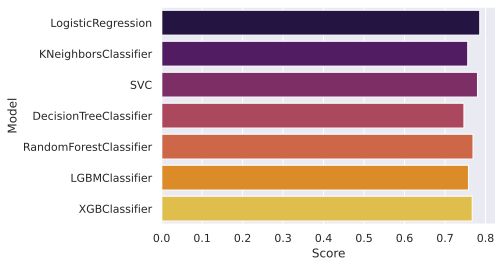

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

sc = StandardScaler()
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

log_params = {'penalty':['l1', 'l2'], 
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 100], 
              'solver':['liblinear', 'saga']} 
log_model = GridSearchCV(LogisticRegression(), log_params, cv=5) #Tuning the hyper-parameters
log_model.fit(X_train, y_train)
log_predict = log_model.predict(X_test)
log_score = log_model.best_score_


# knn
knn_params = {'n_neighbors': list(range(3, 20, 2)),
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'metric':['euclidean', 'manhattan', 'chebyshev', 'minkowski']}
knn_model = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5) #Tuning the hyper-parameters
knn_model.fit(X_train, y_train)
knn_predict = knn_model.predict(X_test)
knn_score = knn_model.best_score_


# Support Vector Classification(svc)
svc_params = {'C': [0.001, 0.01, 0.1, 1],
              'kernel': [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]}
svc_model = GridSearchCV(SVC(), svc_params, cv=5) #Tuning the hyper-parameters
svc_model.fit(X_train, y_train)
svc_predict = svc_model.predict(X_test)
svc_score = svc_model.best_score_


# Decision Tree
dt_params = {'criterion' : ['gini', 'entropy'],
              'splitter': ['random', 'best'], 
              'max_depth': [3, 5, 7, 9, 11, 13]}
dt_model = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5) #Tuning the hyper-parameters
dt_model.fit(X_train, y_train)
dt_predict = dt_model.predict(X_test)
dt_score = dt_model.best_score_

# Random Forest
rf_params = {'criterion' : ['gini', 'entropy'],
             'n_estimators': list(range(5, 26, 5)),
             'max_depth': list(range(3, 20, 2))}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5) #Tuning the hyper-parameters
rf_model.fit(X_train, y_train)
rf_predict = rf_model.predict(X_test)
rf_score = rf_model.best_score_

# lgb
lgb_params = {'n_estimators': [5, 10, 15, 20, 25, 50, 100],
                   'learning_rate': [0.01, 0.05, 0.1],
                   'num_leaves': [7, 15, 31],
                  }
lgb_model = GridSearchCV(LGBMClassifier(), lgb_params, cv=5) #Tuning the hyper-parameters
lgb_model.fit(X_train, y_train)
lgb_predict = lgb_model.predict(X_test)
lgb_score = lgb_model.best_score_

# xgb
xgb_params = {'max_depth': [3, 5, 7, 9],
              'n_estimators': [5, 10, 15, 20, 25, 50, 100],
              'learning_rate': [0.01, 0.05, 0.1]}
xgb_model = GridSearchCV(xgb.XGBClassifier(eval_metric='logloss'), xgb_params, cv=5) #Tuning the hyper-parameters
xgb_model.fit(X_train, y_train)
xgb_predict = xgb_model.predict(X_test)
xgb_score = xgb_model.best_score_

models = ['LogisticRegression', 'KNeighborsClassifier', 'SVC', 'DecisionTreeClassifier', 
          'RandomForestClassifier', 'LGBMClassifier', 'XGBClassifier']
scores = [log_score, knn_score, svc_score,dt_score,rf_score, lgb_score, xgb_score]
score_table = pd.DataFrame({'Model':models, 'Score':scores})
score_table.sort_values(by='Score', axis=0, ascending=False)
print(score_table.sort_values(by='Score', ascending=False))
sns.barplot(x = score_table['Score'], y = score_table['Model'], palette='inferno');

- Based on this visualization, we can see that the Logistic Regression model is the best model to use due to the fact that we are getting the highest rated score. 

# Revisiting Research questions:
1. Based on what have seen from the algorithms, we can see that age and pregancies have the highest correlation. We can see that when we implement the logistic regression, our False Positive increases our True Positive rate also increases. However, our True Positive rate has a greater exponential increase than our False Positive rate. When we implement the lasso regression we can see that when whenever our lambda values increase, our correlation is exponential decaying. This also means that our lasso regression model quality is getting worse when our lambda values are increasing.


2. Based on the algorithm we implemented, we were able to identify which model was the best to use for our data. We got a result of the logistic regresssion being the best model to help use make more accurate predictions. However, though it is the most accurate model, we can not confidently make accurate predictions.

# Conclusion
In my research, it was alarming how the data that was given consisted of the fact that about 34.9% of the women (pregnant or not) had diabetes in a sample size of 768, and where there is median age at 24. As we know, diabetes is a disease where a person's ability to produce or react to the hormone insulin is impaired and where their glucose levels are increased at an abnormal rate. As I researched further, I realized that there was a positive correlation between Insulin rates and Glucose rates. This was surprising because I did not know that when glucose rates increase in a person's body, it also increases their insulin rates.

As I continue to do my research, I have found out that there were some issues regarding our dataset. Which was that the data is very limited. It only represented Pima Indian women. We can not confidently predict if an Indian man would have diabetes because it mainly focuses on Indian women. Since our accuracy rate is very low, we do not have the confidence to safely predict if anyone in the Pima Indian population has diabetes.

A second issue is that the data given was from 2017. The data could change today because the coronavirus has affected everyone worldwide. COVID-19 might have affected people living in rural areas even more. Due to a lack of vaccines being available.

As we know, some people were born with diabetes and are naturally skinny. Due to this, we can not assume who is "fat" or has thicker skin has diabetes. We should also not assume that if a person with the thinnest skin does not have diabetes. This fact would connect to our third issue. Our third issue is that the data given had two variables that can affect the predictions. The two variables are skin thickness and BMI. These two variables can affect our predictions because even though a person has a large BMI does not mean that that person has diabetes and vice versa. The same goes for skin thickness.

A fourth issue is that we do not know if our data represents the whole population of Pima Indian women. We do not know if we are given a dataset that consists of a sample of Pima Indian women having diabetes and vice versa.

If I were going to redo this research, I would create a completely random sampling because a random sample will give us a better understanding of the whole population. I should randomly sample a more diverse group of people to create a more random sample.